<font size="3"><font color = "blue"><strong>NAME: AASHIK BHARATH EGNYA VARAHAN</strong></font><br>
<font size="3"><font color = "blue"><strong>STUDENT NO.: R00182866</strong></font>

<font size="6"><strong><center>APPLIED MACHINE LEARNING<center></strong></font>

<font size="5"><strong><center><i>PROJECT-2</i><center></strong></font>

<font size="3"><font color = "red"><strong><center>IMPROVING CARDIOVASCULAR DISEASE RISK PREDICTION USING CLASSIFIERS AND ENSEMBLE TECHNIQUES<center></strong></font>

<b>INTRODUCTION:</b><br>

In this project, one of the most prominent disease around the world, <b>Cardiovascular Disease</b> will be predicted based on the demographic information, blood sample reports and other medical reports.

<b>DATASET:</b>

The dataset was obtained from Cleveland Clinic Foundation in Switzerland where observations collected from different set of people were recorded. This dataset is a part of the database which contains 14 features and 303 observations.

<b>Python Imports</b>

In [33]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns

# For Data Splitting
from sklearn.model_selection import train_test_split
# For Data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Accuracy Score Metrics
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

<b>GLIMPSE OF THE DATASET:</b>

In [34]:
# Importing Dataset
heart_dataset = pd.read_csv("heart.csv")

heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above, we can observe that there are no Missing Values in this dataset and all the categorical variables are mutated already as numbers depending on the range of category.

Let us now look at the descriptive statistics of the dataset:

In [35]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We can see that the scale of each feature column is different and varied.

<b>FEATURE DESCRIPTION:</b>

The description of each feature in the dataset is given below:

![](Dataset_Description.jpg)

<b>Types of Features:</b>
    
<li><b>Categorical features </b> (Has two or more categories and each value in that feature can be categorised by them): sex, chest_pain

<b>Ordinal features</b> (Variable having relative ordering or sorting between the values): fasting_blood_sugar, electrocardiographic, induced_angina, slope, no_of_vessels, thal, diagnosis

<li><b>Continuous features</b> (Variable taking values between any two points or between the minimum or maximum values in the feature column): age, blood_pressure, serum_cholestoral, max_heart_rate, ST_depression

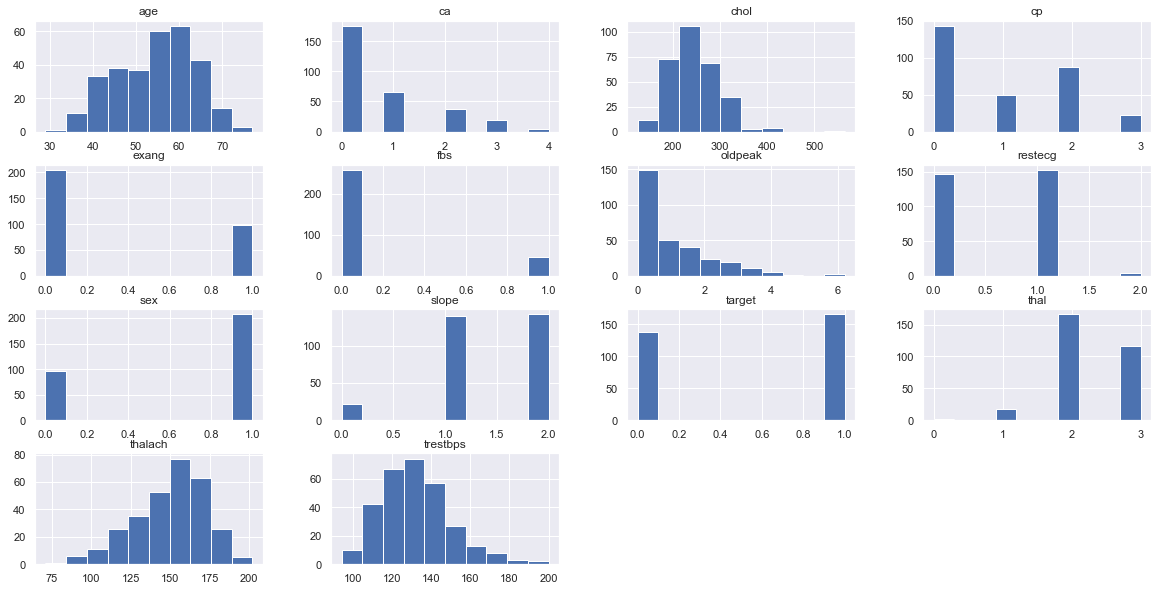

In [36]:
# Histogram of the Heart Dataset

fig = plt.figure(figsize = (20,10))
heart_dataset.hist(ax = fig.gca());

From the above histogram plots, we can see that the features are skewed and not normally distributed. Also, the scales are different between one and another.

<b><font size="3">Understanding the Data</font></b>

Let us observe the creelation between different features with help of a heat mat

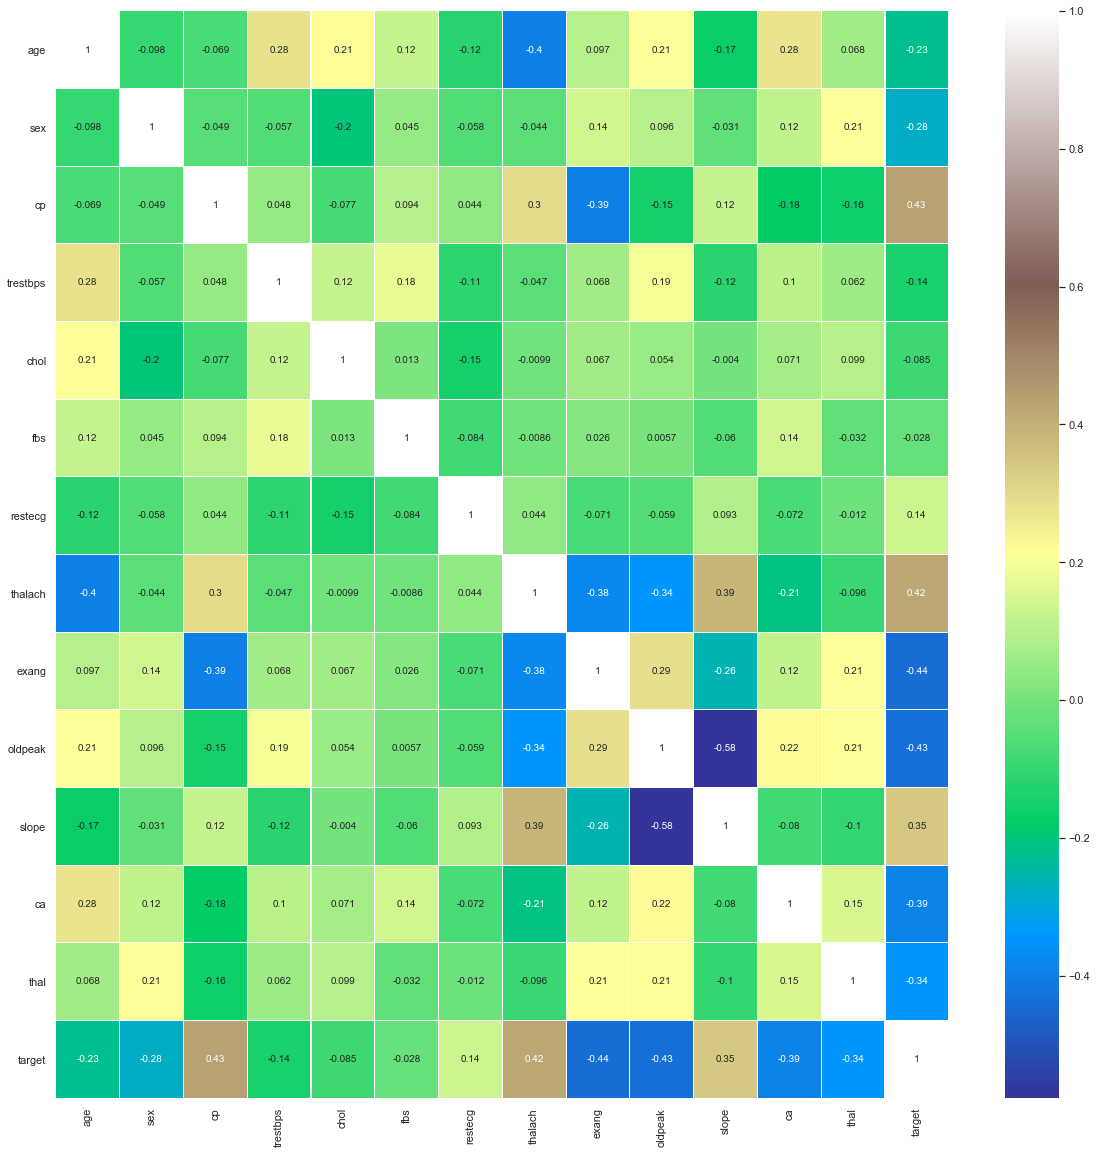

In [37]:
# creating a correlation heatmap
sns.heatmap(heart_dataset.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

From the above HeatMap, we can see that cp and thalach are the features with highest positive correlation whereas exang, oldpeak and ca are negatively correlated. While other features do not hold much correlation with the response variable "target".

<b><font size="3">Data PreProcessing</font></b>

We have understood the data and the underlying patterns, importance of each features. Now let us PreProcess the data to achieve the deep insight from each of its features.

<b>Outlier Detection</b>

Since the dataset is not large, we cannot discard the outliers. We will treat the outliers as potential observations.

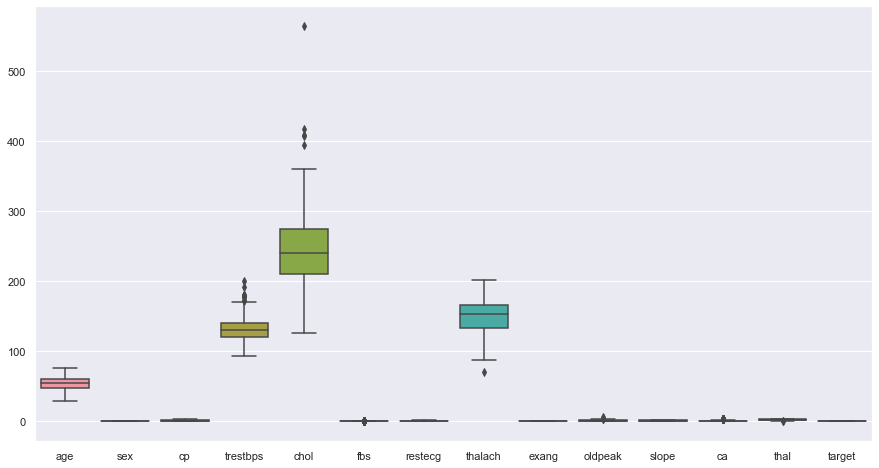

In [38]:
# Boxplots
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=heart_dataset, ax=ax);

From the Whisker Plot, we can interpret that there are outliers in most of the continuous variables. But it is highly unpredictable to find the potential outliers from this data. So, the data needs to be scaled (standardised or normalised) to behave better during Modelling process.

<b>Dealing with Missing Values</b>

We have already explored the dataset for any missing NA values and found none.

In [39]:
# NAs present in each feature columns
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<b>Handling Categorical Data</b>

In [40]:
#one-hot encoding
heart_dataset_one = pd.get_dummies(heart_dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Displaying the dataset after creating dummy variables
pd.set_option('display.max_columns', 35)
print(heart_dataset_one)

     age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0     63       145   233      150      2.3       1      0      1     0     0   
1     37       130   250      187      3.5       1      0      1     0     0   
2     41       130   204      172      1.4       1      1      0     0     1   
3     56       120   236      178      0.8       1      0      1     0     1   
4     57       120   354      163      0.6       1      1      0     1     0   
..   ...       ...   ...      ...      ...     ...    ...    ...   ...   ...   
298   57       140   241      123      0.2       0      1      0     1     0   
299   45       110   264      132      1.2       0      0      1     0     0   
300   68       144   193      141      3.4       0      0      1     1     0   
301   57       130   131      115      1.2       0      0      1     1     0   
302   57       130   236      174      0.0       0      1      0     0     1   

     cp_2  cp_3  fbs_0  fbs_1  restecg_

With the help of get.dummies() function, we were able to encode the Categorical Feature with new dummy features for each unique value in the feature column. 

We can now observe that we have 31 features with the same 303 observations in the new dataset.

<b>Scaling Data</b>

Feature Scaling is an important step in pre-processing for Machine Learning. The majority of ML and optimization algorithms behave better if the features are on the same scale.

For this dataset, we will be scaling the data using both Normalization and Standardization.

<b>Standardized Data</b>

In [41]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Standardizing Data
standardScaler = StandardScaler()

X_standardized = heart_dataset_one

X_standardized[columns_to_scale] = standardScaler.fit_transform(heart_dataset_one[columns_to_scale])
print(X_standardized)

          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  cp_2  cp_3  fbs_0  fbs_1  restecg_

After Standardization of the dataset, the selected features are transformed to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. <br>

This scaling happened independently on each individual selected feature by computing the relevant statistics on the samples in the training set.

<b> Normalized Data</b>

In [42]:
# Normalizing Data
normalizedScaler = MinMaxScaler()

X_normalized = heart_dataset_one

X_normalized[columns_to_scale] = normalizedScaler.fit_transform(heart_dataset_one[columns_to_scale])
print(X_normalized)

          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.708333  0.481132  0.244292  0.603053  0.370968       1      0      1   
1    0.166667  0.339623  0.283105  0.885496  0.564516       1      0      1   
2    0.250000  0.339623  0.178082  0.770992  0.225806       1      1      0   
3    0.562500  0.245283  0.251142  0.816794  0.129032       1      0      1   
4    0.583333  0.245283  0.520548  0.702290  0.096774       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.583333  0.433962  0.262557  0.396947  0.032258       0      1      0   
299  0.333333  0.150943  0.315068  0.465649  0.193548       0      0      1   
300  0.812500  0.471698  0.152968  0.534351  0.548387       0      0      1   
301  0.583333  0.339623  0.011416  0.335878  0.193548       0      0      1   
302  0.583333  0.339623  0.251142  0.786260  0.000000       0      1      0   

     cp_0  cp_1  cp_2  cp_3  fbs_0  fbs_1  restecg_

After Normalisation of the dataset, the selected features are rescaled into the range between 0 and 1. <br>

It improves the performance of algorithms which assigns a weight to features such as linear regression and algorithms that utilize geometric distance such as KNNs. 

<b>Handling Imbalance</b>

Imbalance in a dataset leads to inaccuracy and high precision, recall scores. There are certain resampling techniques such as undersampling and oversampling to handle these issues.

Considering our dataset, the response variable target has two outcomes "Patients with Heart Disease" and "Patients without Heart Disease". Let us now observe their distribution in the dataset.

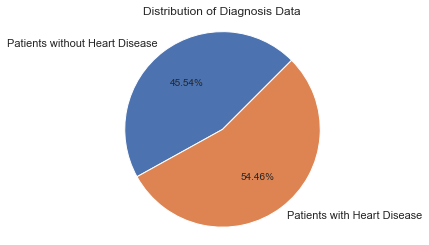

Percentage of Patients with Heart problems: 54.46
Percentage of Patients without Heart problems: 45.54


In [43]:
target_1 = float(len(heart_dataset[heart_dataset_one.target == 1])/len(heart_dataset))
target_0 = float(len(heart_dataset[heart_dataset_one.target == 0])/len(heart_dataset))

pieLabels='Patients without Heart Disease', 'Patients with Heart Disease'
TargetDis = [target_0, target_1]
figureObject, axesObject = plt.subplots()
axesObject.pie(TargetDis,labels=pieLabels,autopct='%1.2f%%',startangle=45)
axesObject.axis('equal')
plt.title("Distribution of Diagnosis Data")
plt.show()

print("Percentage of Patients with Heart problems: "+str(round(target_1*100,2)))
print("Percentage of Patients without Heart problems: "+str(round(target_0*100,2)))

From the above chart, we can conclude even when the distribution is not exactly 50:50, but still the data is good enough to use on machine learning algorithms and to predict standard metrics like Accuracy and AUC scores. So, we do not need to resample this dataset.

<b>Data Split - Train & Test</b>

In [44]:
target = X_standardized.target
X_standardized.drop(["target"], axis=1, inplace=True)
predictors = X_standardized
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=866)

Here, the dataset is split as training data and test data in the ratio of 80:20 for further processing and model training.

<b>Feature Selection</b>

<i><li>Univariate Feature Selection</i>

In [45]:
## Univariate feature extraction
UnivariateFS = SelectKBest(score_func=f_classif, k=5)
UnivariateFS.fit(X_train, Y_train)
X_train_UFS = UnivariateFS.transform(X_train)
X_test_UFS = UnivariateFS.transform(X_test)

<i><li>Tree based Feature Selection</i>

In [46]:
### Tree based Feature Selection
TreeFS = ExtraTreesClassifier(n_estimators=500, random_state=866)
TreeFS.fit(X_train, Y_train)
print(X_train.columns)
TreeFS.feature_importances_

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


array([0.05234302, 0.04282289, 0.05065922, 0.0570821 , 0.05460369,
       0.01876643, 0.01937277, 0.11164367, 0.01525008, 0.03125155,
       0.00985265, 0.01055609, 0.01107912, 0.02083225, 0.02159372,
       0.00118896, 0.03559954, 0.04088626, 0.00596174, 0.03322732,
       0.04027339, 0.07864848, 0.02343315, 0.01609288, 0.01027641,
       0.0036303 , 0.00079194, 0.00698455, 0.10886858, 0.06642725])

From the above feature importance scores, we can observe that <b>"thalach", "oldpeak","cp","exang" & "thal"</b> have high importance than other features.

<b>Generalised Model Training Function</b>

In [47]:
## To train the model with different classifier algorithms
def train_model(X_train, Y_train, X_test, Y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,Y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

<b>Logistic Regression</b>

In [48]:
# Hyper-Tuning Parameters
C_param_range = [0.001,0.01,0.1,1,10,100]

print("\033[1mWithout Feature Selection\033[0m")
for i in C_param_range:
    print()
    print("C Value: ", i)
    model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression, C=i, random_state=866)

print("\n")
print("\n")
print("\033[1mWith Feature Selection\033[0m")
for i in C_param_range:
    print()
    print("C Value: ", i)
    model = train_model(X_train_UFS, Y_train, X_test_UFS, Y_test, LogisticRegression, C=i, random_state=866)

Without Feature Selection

C Value:  0.001
Train accuracy: 55.37%
Test accuracy: 50.82%

C Value:  0.01
Train accuracy: 85.54%
Test accuracy: 78.69%

C Value:  0.1
Train accuracy: 86.36%
Test accuracy: 81.97%

C Value:  1
Train accuracy: 87.19%
Test accuracy: 85.25%

C Value:  10
Train accuracy: 87.60%
Test accuracy: 81.97%

C Value:  100
Train accuracy: 88.43%
Test accuracy: 81.97%




With Feature Selection

C Value:  0.001
Train accuracy: 55.37%
Test accuracy: 50.82%

C Value:  0.01
Train accuracy: 80.99%
Test accuracy: 73.77%

C Value:  0.1
Train accuracy: 85.12%
Test accuracy: 83.61%

C Value:  1
Train accuracy: 85.54%
Test accuracy: 85.25%

C Value:  10
Train accuracy: 85.95%
Test accuracy: 83.61%

C Value:  100
Train accuracy: 85.54%
Test accuracy: 81.97%


The above results shows that the Logistic Regression model performs well after feature selection. The best model can be obtained with selected features for a Regularization strength value of C = 100. So, the final model will be trained based on this parameter.

In [49]:
## Final Model for Logistic Regression
lg_model = LogisticRegression(solver="liblinear", C=100, random_state=866)

lg_model.fit(X_train, Y_train)
lg_model_pred_full = lg_model.predict(X_test)
score_lr_full = round(accuracy_score(lg_model_pred_full, Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression with complete feature set is: "+str(score_lr_full)+" %")

lg_model.fit(X_train_UFS, Y_train)
lg_model_pred = lg_model.predict(X_test_UFS)
score_lr = round(accuracy_score(lg_model_pred, Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression [without RFE] is: "+str(score_lr)+" %")

lg_model = RFE(lg_model, 4)
lg_model.fit(X_train_UFS, Y_train)
lg_model_pred = lg_model.predict(X_test_UFS)
score_lr_rfe = round(accuracy_score(lg_model_pred, Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression [with RFE] is: "+str(score_lr_rfe)+" %")

The accuracy score achieved using Logistic Regression with complete feature set is: 81.97 %
The accuracy score achieved using Logistic Regression [without RFE] is: 81.97 %
The accuracy score achieved using Logistic Regression [with RFE] is: 83.61 %


<b>Gaussian Naive Bayes</b>

In [50]:
## Performs Well
print("\033[1mWithout Feature Selection\033[0m")
print()
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)
print("\n")
print("\033[1mWith Feature Selection\033[0m")
print()
model = train_model(X_train_UFS, Y_train, X_test_UFS, Y_test, GaussianNB)

Without Feature Selection

Train accuracy: 72.73%
Test accuracy: 75.41%


With Feature Selection

Train accuracy: 81.82%
Test accuracy: 80.33%


From the above results, we can observe that the model performs well after feature selection. Initially, the model shows a Train accuracy of 72.73% and Test accuracy of 75.41% which seems to be overfitting. But after feature selection, the accuracy has been increased and the model has also overcome the problem of overfitting.

In [51]:
# Gaussian NB
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
gnb_model_pred_full = gnb_model.predict(X_test)
score_gnb_full = round(accuracy_score(gnb_model_pred_full, Y_test)*100,2)
print("The accuracy score achieved using Gaussian NB with complete feature set is: "+str(score_gnb_full)+" %")


gnb_model.fit(X_train_UFS, Y_train)
gnb_model_pred = gnb_model.predict(X_test_UFS)
score_gnb = round(accuracy_score(gnb_model_pred, Y_test)*100,2)
print("The accuracy score achieved using Gaussian NB is: "+str(score_gnb)+" %")

The accuracy score achieved using Gaussian NB with complete feature set is: 75.41 %
The accuracy score achieved using Gaussian NB is: 80.33 %


<b> KNN Classification </b>

In [52]:
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 88.84%
Test accuracy: 83.61%


<i>Parameters Hypertuning</i>

In [53]:
#### Running this cell takes more than 15 minutes
# Used for Hyper Parameter tuning


# #List Hyperparameters that we want to tune.
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(X_train,Y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [54]:
print("\033[1mWithout Feature Selection\033[0m")
print()
## For the best hyper-tuned parameters
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, leaf_size=1, n_neighbors=9)

print("\n")
print()
print("\033[1mWith Feature Selection\033[0m")
## Feature Selected model
for i in range(1,10):
    print()
    print("n_neighors value = ", i)
    model = train_model(X_train_UFS, Y_train, X_test_UFS, Y_test, KNeighborsClassifier, n_neighbors=i)

Without Feature Selection

Train accuracy: 88.84%
Test accuracy: 75.41%



With Feature Selection

n_neighors value =  1
Train accuracy: 93.80%
Test accuracy: 81.97%

n_neighors value =  2
Train accuracy: 87.60%
Test accuracy: 81.97%

n_neighors value =  3
Train accuracy: 86.78%
Test accuracy: 80.33%

n_neighors value =  4
Train accuracy: 85.12%
Test accuracy: 81.97%

n_neighors value =  5
Train accuracy: 84.30%
Test accuracy: 77.05%

n_neighors value =  6
Train accuracy: 84.71%
Test accuracy: 86.89%

n_neighors value =  7
Train accuracy: 85.54%
Test accuracy: 81.97%

n_neighors value =  8
Train accuracy: 85.54%
Test accuracy: 86.89%

n_neighors value =  9
Train accuracy: 84.71%
Test accuracy: 85.25%


In [55]:
### KNN Classification
knn_model = KNeighborsClassifier(n_neighbors=9)

knn_model. fit(X_train, Y_train)
knn_model_pred = knn_model.predict(X_test)
score_knn_full = round(accuracy_score(knn_model_pred, Y_test)*100,2)
print("The accuracy score achieved using KNearesrNeighbors Classifier with complete feature set is: "+str(score_knn_full)+" %")



knn_model. fit(X_train_UFS, Y_train)
knn_model_pred = knn_model.predict(X_test_UFS)
score_knn = round(accuracy_score(knn_model_pred, Y_test)*100,2)
print("The accuracy score achieved using KNearesrNeighbors Classifier is: "+str(score_knn)+" %")

The accuracy score achieved using KNearesrNeighbors Classifier with complete feature set is: 75.41 %
The accuracy score achieved using KNearesrNeighbors Classifier is: 85.25 %


<b> Random Forest Classifier </b>

In [56]:
## Random Forest Classifier
#from sklearn.ensemble import RandomForestClassifier
max_features = [3,5,10,15,20,25]

# Without Feature Select
print("Without Feature Selection")
print()
for i in max_features:
        print()
        print("max_features = ", i)
        model = train_model(X_train, Y_train, X_test, Y_test, RandomForestClassifier, n_estimators=500, max_features=i, random_state=866)

Without Feature Selection


max_features =  3
Train accuracy: 100.00%
Test accuracy: 85.25%

max_features =  5
Train accuracy: 100.00%
Test accuracy: 85.25%

max_features =  10
Train accuracy: 100.00%
Test accuracy: 81.97%

max_features =  15
Train accuracy: 100.00%
Test accuracy: 80.33%

max_features =  20
Train accuracy: 100.00%
Test accuracy: 81.97%

max_features =  25
Train accuracy: 100.00%
Test accuracy: 80.33%


In [57]:
print("With Feature Selection")
print()
for i in range(1,6):
        print()
        print("max_features = ", i)
        model = train_model(X_train_UFS, Y_train, X_test_UFS, Y_test, RandomForestClassifier, n_estimators=500, max_features=i)

With Feature Selection


max_features =  1
Train accuracy: 95.45%
Test accuracy: 83.61%

max_features =  2
Train accuracy: 95.45%
Test accuracy: 83.61%

max_features =  3
Train accuracy: 95.45%
Test accuracy: 83.61%

max_features =  4
Train accuracy: 95.45%
Test accuracy: 80.33%

max_features =  5
Train accuracy: 95.45%
Test accuracy: 78.69%


In [58]:
## Random Forest
rf_model = RandomForestClassifier(n_estimators=500, max_features=4, random_state=866)

rf_model.fit(X_train, Y_train)
rf_model_pred = rf_model.predict(X_test)
score_rf_full = round(accuracy_score(rf_model_pred, Y_test)*100,2)
print("The accuracy score achieved using Random Forest Classifier with complete feature set is: "+str(score_rf_full)+" %")

rf_model.fit(X_train_UFS, Y_train)
rf_model_pred = rf_model.predict(X_test_UFS)
score_rf = round(accuracy_score(rf_model_pred, Y_test)*100,2)
print("The accuracy score achieved using Random Forest Classifier is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest Classifier with complete feature set is: 83.61 %
The accuracy score achieved using Random Forest Classifier is: 81.97 %


<b>Visualizing Accuracy Plots - Complete Feature Set</b>

The accuracy score achieved using Logistic Regression is: 81.97 %
The accuracy score achieved using Gaussian NB is: 75.41 %
The accuracy score achieved using KNN is: 75.41 %
The accuracy score achieved using Random Forest is: 83.61 %



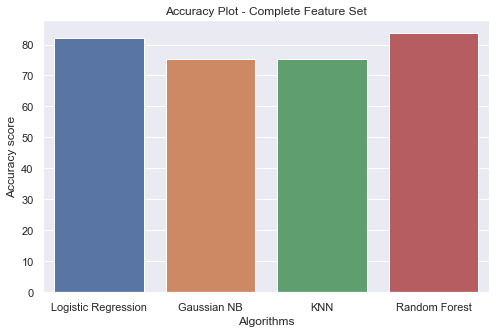

In [59]:
# Complete Feature Set
scores = [score_lr_full,score_gnb_full,score_knn_full,score_rf_full]
algorithms = ["Logistic Regression","Gaussian NB","KNN","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    
## Visualizing the accuracy plot
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
print()
sns.barplot(algorithms,scores).set_title("Accuracy Plot - Complete Feature Set");

<b>Visualizing Accuracy Plots - Selected Features</b>

The accuracy score achieved using Logistic Regression is: 83.61 %
The accuracy score achieved using Gaussian NB is: 80.33 %
The accuracy score achieved using KNN is: 85.25 %
The accuracy score achieved using Random Forest is: 81.97 %



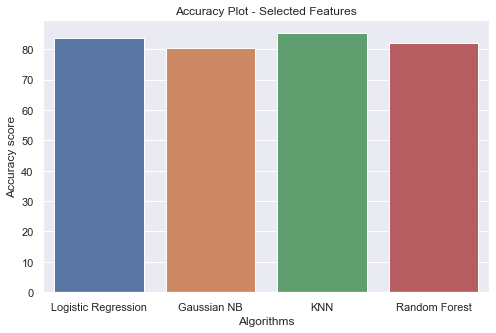

In [60]:
# Selected Features
scores = [score_lr_rfe,score_gnb,score_knn,score_rf]
algorithms = ["Logistic Regression","Gaussian NB","KNN","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

    
## Visualizing the accuracy plot
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
print()
sns.barplot(algorithms,scores).set_title("Accuracy Plot - Selected Features");

From the above two plots, we can observe that the accuracy of the classifiers have increased considerably after selecting the features which have high importance to the target variables and removing the irrelevant features.

<b>Voting Ensemble Classifier</b>

In [61]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=866)
estimators=[]
estimators.append(('lr',lg_model))
estimators.append(('gnb',gnb_model))
estimators.append(('knn',knn_model))
estimators.append(('rf',rf_model))

ensemble = VotingClassifier(estimators)
#print(ensemble)
results = model_selection.cross_val_score(ensemble, X_train_UFS, Y_train, cv=kfold)
acc_score = round(results.mean()*100,2)
print("The accuracy of the ensemble classifier is:", acc_score, "%")

The accuracy of the ensemble classifier is: 83.9 %
